In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import lognorm

In [43]:
file = open('Data4t.csv','r')
txt = file.read()
txt = txt.replace(',','.')
file = open('Data4t.csv','w')
file.write(txt)
file.close()

In [44]:
df1 = pd.read_csv('Data4-1.csv',delimiter=';')
df2 = pd.read_csv('Data4-2.csv',delimiter=';')

<Figure size 1080x720 with 0 Axes>

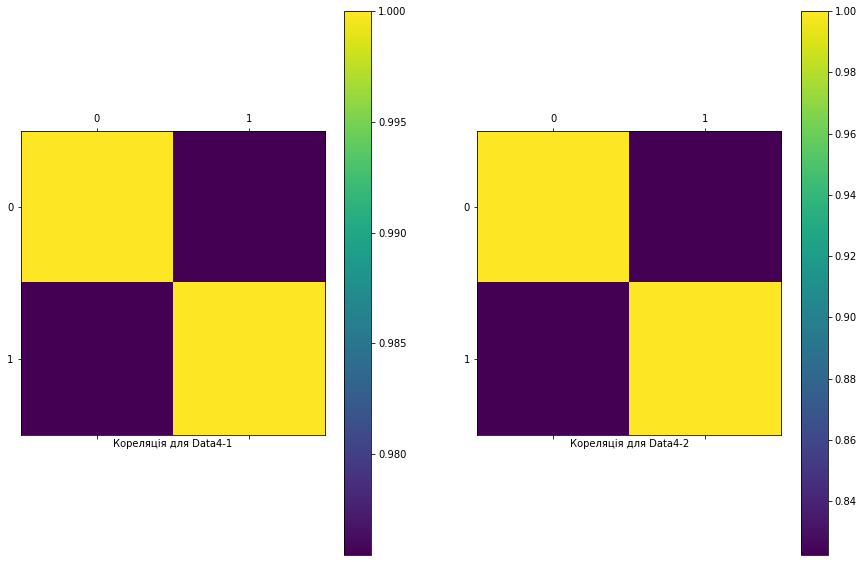

In [45]:
corr1 = np.corrcoef(df1['Par 1'],df1['Par 2'])
corr2 = np.corrcoef(df2['Par 1'],df2['Par 2'])

plt.figure(figsize=(15,10))

fig, ax = plt.subplots(1,2, figsize=(15,10))

left = ax[0].matshow(corr1)
ax[0].set_xlabel('Кореляція для Data4-1')
plt.colorbar(left, ax=ax[0])
right = ax[1].matshow(corr2)
ax[1].set_xlabel('Кореляція для Data4-2')
plt.colorbar(right, ax=ax[1])

plt.show()


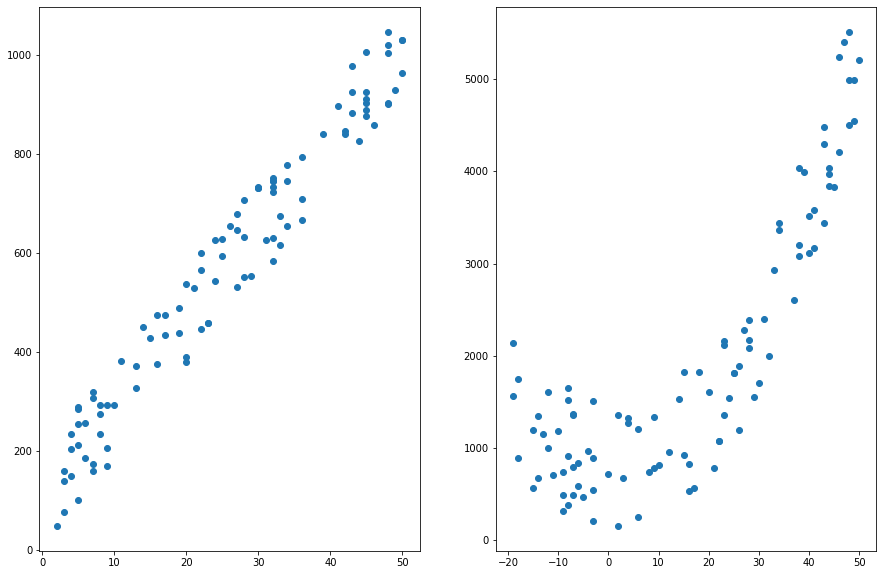

In [46]:
x1 = df1['Par 1']
y1 = df1['Par 2']
x2 = df2['Par 1']
y2 = df2['Par 2']

fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].scatter(x=x1,y=y1)
ax[1].scatter(x=x2,y=y2)
plt.show()

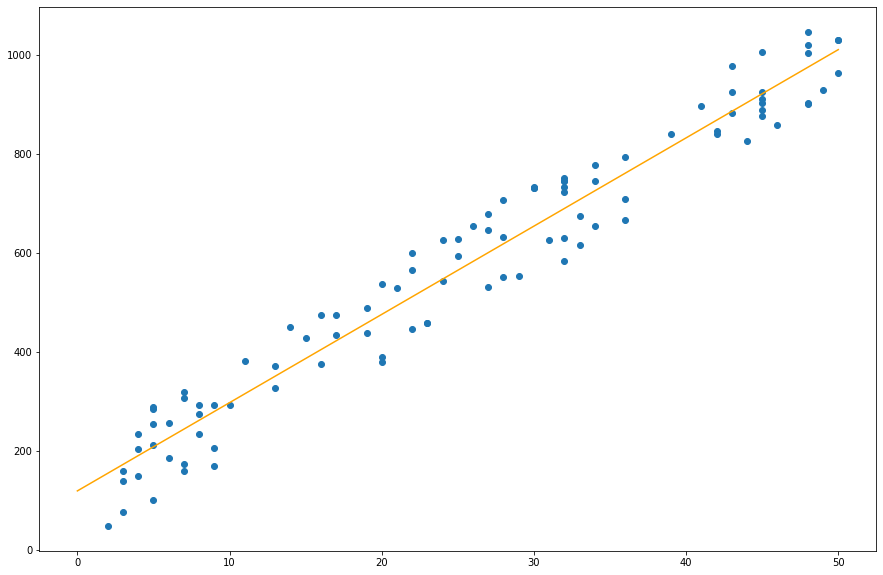

In [47]:
x = np.array(x1).reshape(-1,1)
y = np.array(y1).reshape(-1,1)

reg = LinearRegression().fit(x,y)

x_test = np.linspace(0, 50, 100).reshape(-1,1)
y_test = reg.predict(x_test)

fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.scatter(x=x1,y=y1)
ax.plot(x_test,y_test, color='orange')

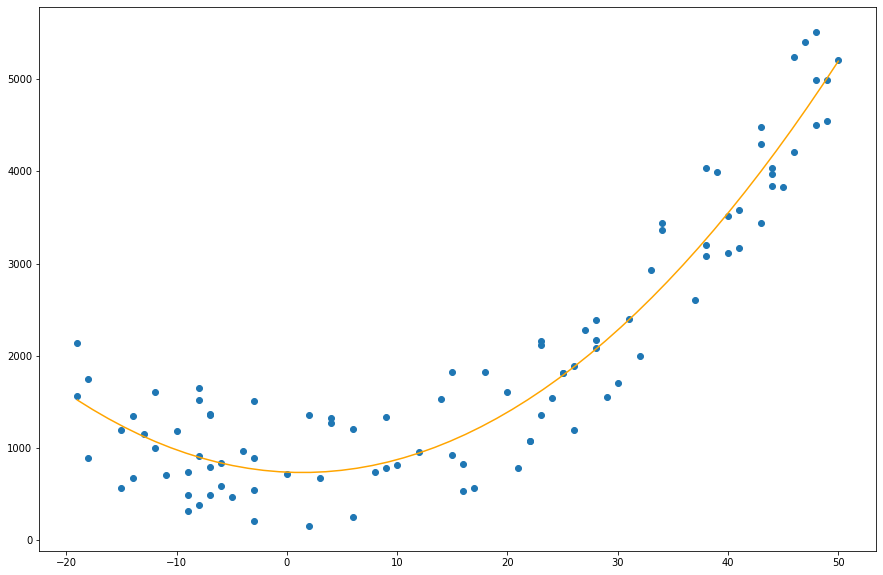

In [48]:
x = np.array(x2).reshape(-1,1)
y = np.array(y2).reshape(-1,1)

pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

pipeline.fit(x,y)

x_test = np.linspace(x.min(), x.max()).reshape(-1,1)
y_test = pipeline.predict(x_test)


fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.scatter(x=x2,y=y2)
ax.plot(x_test, y_test, color='orange')

In [49]:
df = pd.read_csv('Data2.csv',delimiter=';',encoding='windows-1252')
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350.0
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,NaN,6020.0
214,Yemen. Rep.,Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0


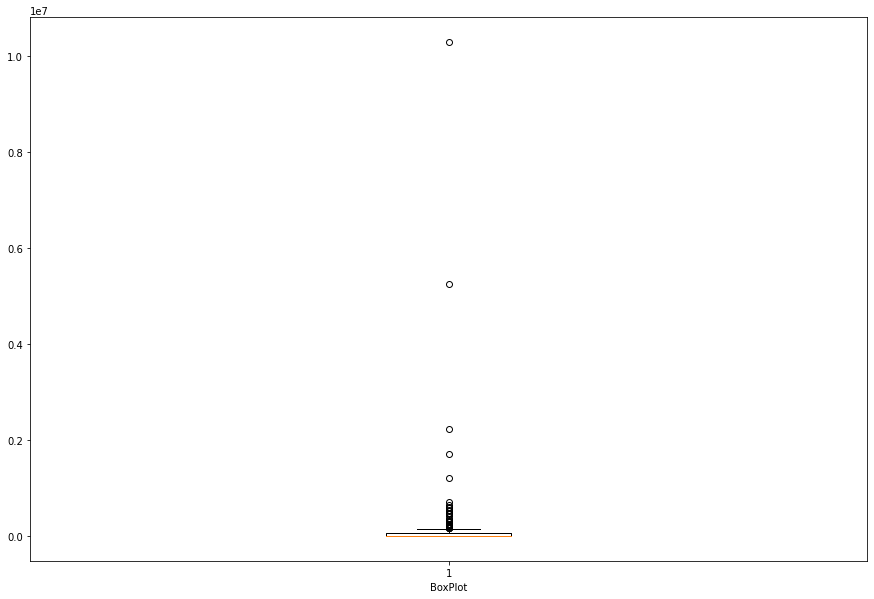

In [50]:
co2_emissions = df[df['CO2 emission'].notnull()]['CO2 emission']

fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.boxplot(co2_emissions)
ax.set_xlabel('BoxPlot')

plt.show()

In [51]:
values = df[df['CO2 emission'].notnull()]['CO2 emission'].sort_values(ascending=False).to_numpy()
outlier = values[0]
std = st.stdev(values)
mean = st.mean(values)
t = np.abs(outlier - mean) / std
print(f'Значення, що отримали ми: {t}')
print(f'Критичне значення для вибірки в 200 елементів за критерієми Шовене: ~3')

Значення, що отримали ми: 12.149224991748723
Критичне значення для вибірки в 200 елементів за критерієми Шовене: ~3


In [52]:
df1 = df[df['CO2 emission'].between(np.quantile(values, 0.25), np.quantile(values, 0.75))]
df1 = df1.fillna(df1.mean())
df = df.fillna(df.mean())

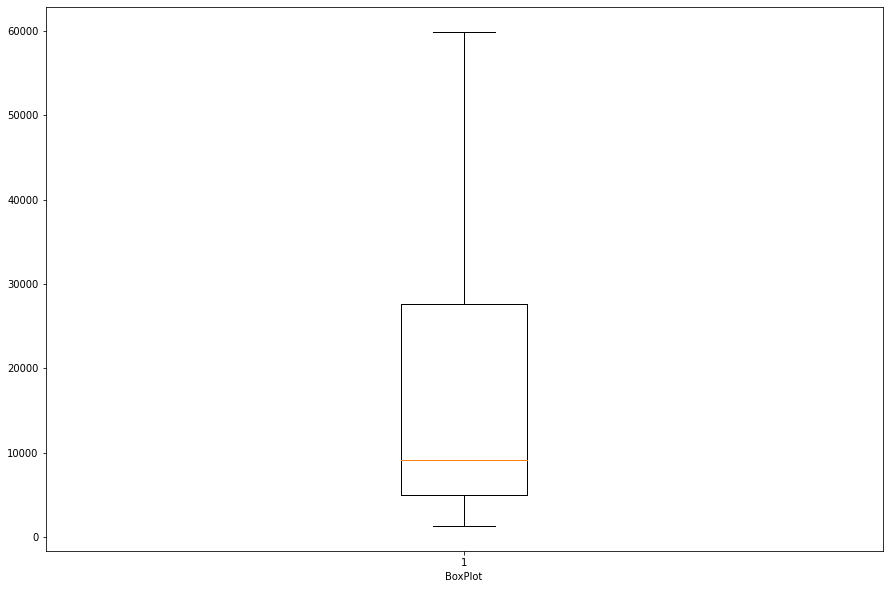

In [53]:
co2_emissions = df1[df1['CO2 emission'].notnull()]['CO2 emission']

fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.boxplot(co2_emissions)
ax.set_xlabel('BoxPlot')

plt.show()

In [54]:
df['CO2 emission per 1000'] = df['CO2 emission'] / df['Populatiion'] * 1000
df1['CO2 emission per 1000'] = df1['CO2 emission'] / df1['Populatiion'] * 1000

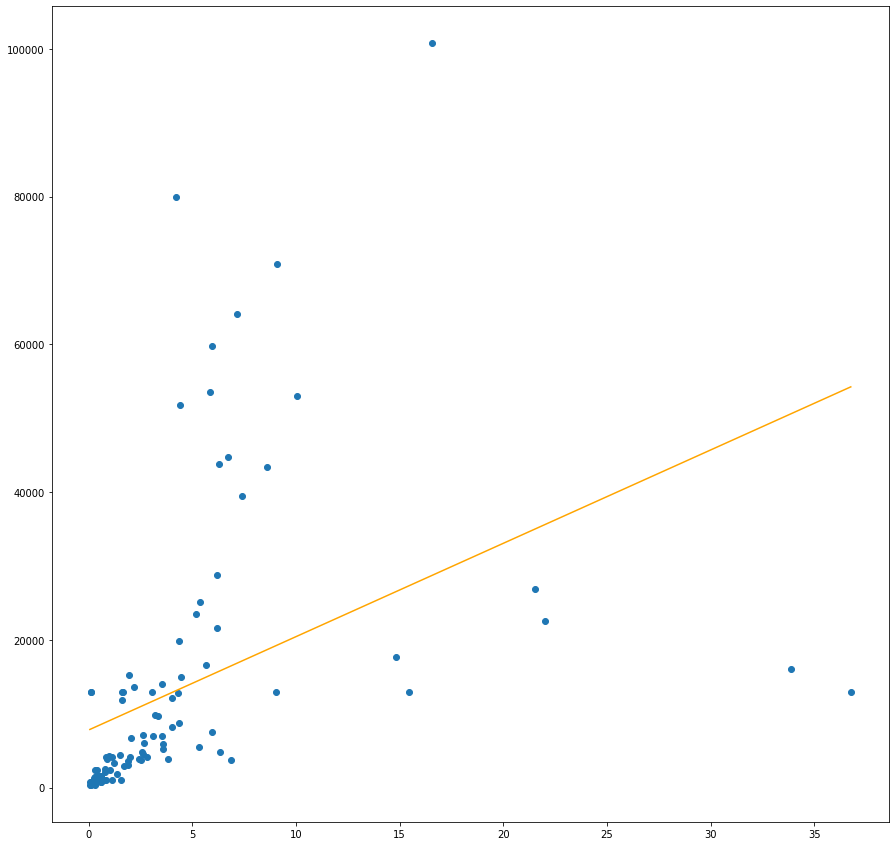

10319.548443371852


In [55]:
gdp_per_capita = df1['GDP per capita'].to_numpy().reshape(-1,1)
co2_per_1000 = df1['CO2 emission per 1000'].to_numpy().reshape(-1,1)

reg = LinearRegression().fit(co2_per_1000,gdp_per_capita)

test_x = np.linspace(co2_per_1000.min(), co2_per_1000.max()).reshape(-1,1)
test_y = reg.predict(test_x)
plt.figure(figsize=(15,15))
plt.scatter(x=co2_per_1000, y=gdp_per_capita)
plt.plot(test_x, test_y, color='orange')
plt.show()
print(reg.predict(np.array([[2]]))[0,0])

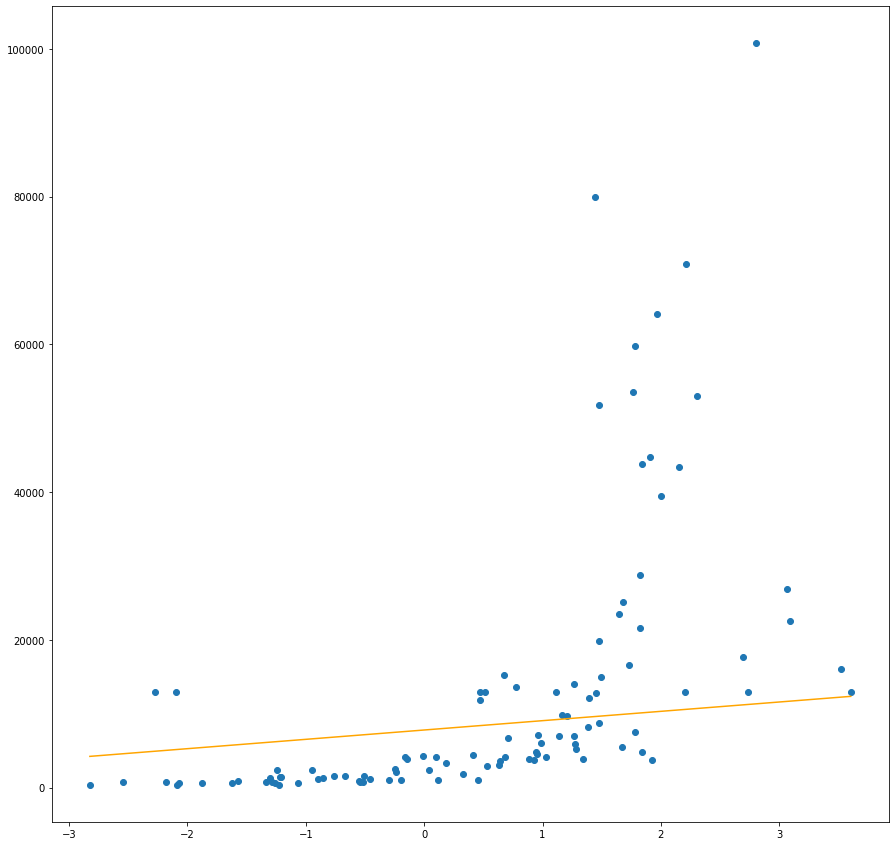

10319.548443371852


In [56]:
norm_co2 = np.log(df1['CO2 emission per 1000'].to_numpy())

reg_norm = LinearRegression().fit(norm_co2.reshape(-1, 1), df1['GDP per capita'])

test_x = np.linspace(norm_co2.min(), norm_co2.max()).reshape(-1, 1)
test_y = reg.predict(test_x)

plt.figure(figsize=(15,15))
plt.scatter(norm_co2, df1['GDP per capita'])
plt.plot(test_x, test_y, color='orange')

plt.show()

print(reg.predict(np.array([[2]]))[0,0])

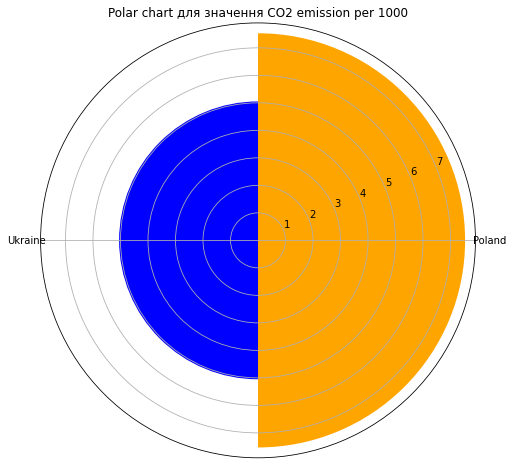

In [23]:
sample = df[(df['Country Name'] == 'Ukraine') | (df['Country Name'] == 'Poland')]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

N = len(sample)

theta = np.arange(0, 2 * np.pi, 2 * np.pi / N) 
bars = ax.bar(theta, sample['CO2 emission per 1000'], 2 * np.pi / N, color=['Orange','Blue'])

ax.set_title('Polar chart для значення CO2 emission per 1000')
ax.set_xticks(theta)
ax.set_xticklabels(sample['Country Name'])
plt.show()

In [29]:
df = pd.read_csv('Data4.csv', delimiter=';', encoding='ANSI')

In [30]:
df

,Unnamed: 0,ISO,UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,0.973924,0.605348,0.538673,0.510113
1,Algeria,DZA,Алжир,0.782134,0.587219,0.348159,0.497986
2,Angola,AGO,Ангола,0.372344,0.274394,0.332117,0.346907
3,Argentina,ARG,Аргентина,0.883830,0.699685,0.281995,0.518820
4,Armenia,ARM,Вірменія,1.016499,0.718327,0.535648,0.486498
...,...,...,...,...,...,...,...
127,Uruguay,URY,Уруґвай,1.198779,0.612819,0.568067,0.648819
128,Venezuela. Bolivarian Republic of,VEN,Венесуела. Боліварська Республіка,0.703460,0.670452,0.249923,0.367244
129,Viet Nam,VNM,В'єтнам,0.553256,0.371843,0.393854,0.423359
130,Yemen,YEM,Ємен,0.364579,0.244049,0.357660,0.330743


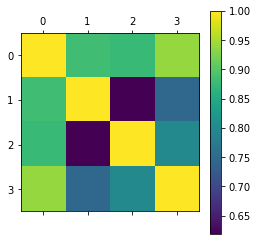

In [31]:
plt.matshow(df.corr())
plt.colorbar()

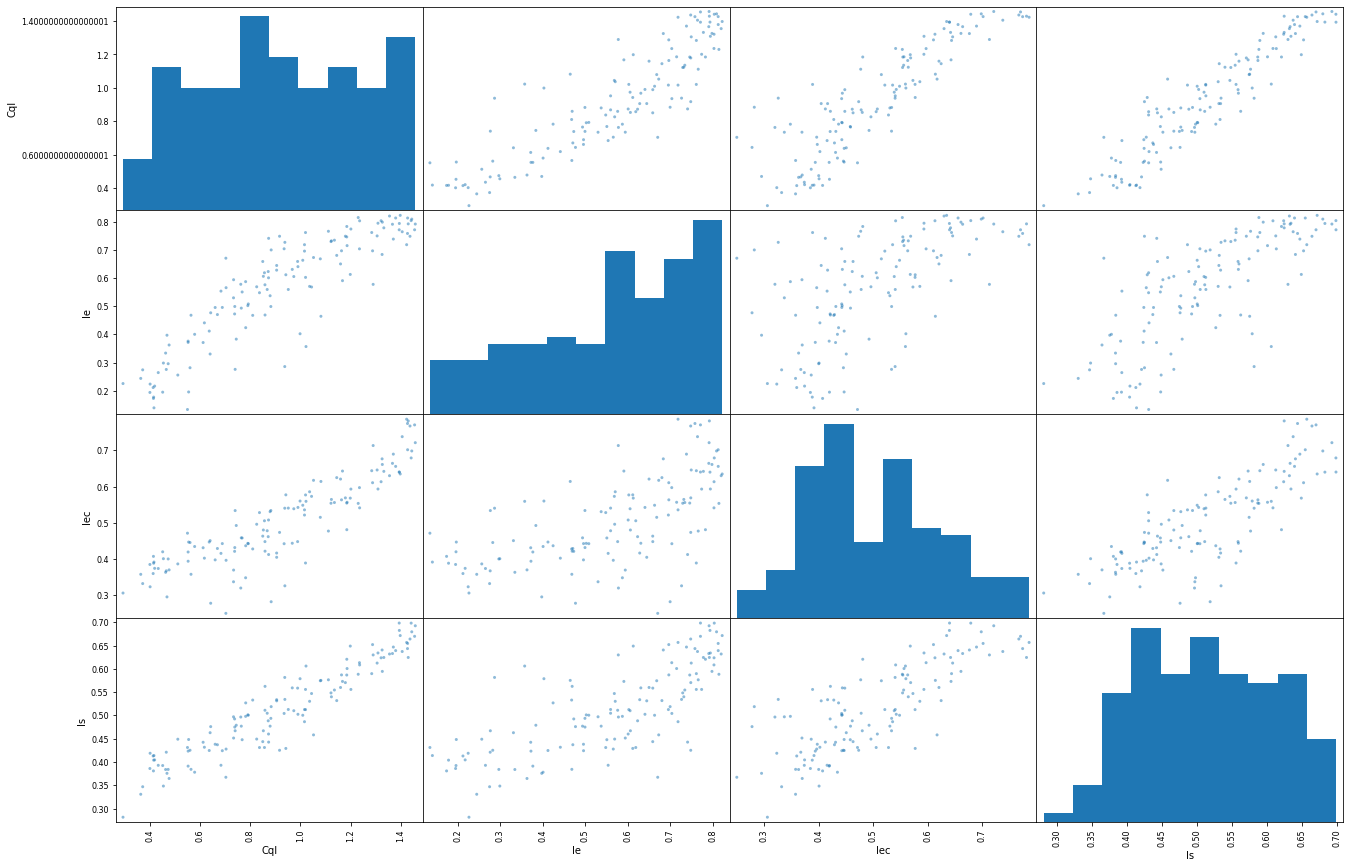

In [32]:
pd.plotting.scatter_matrix(df, figsize=(22,15))
plt.show()

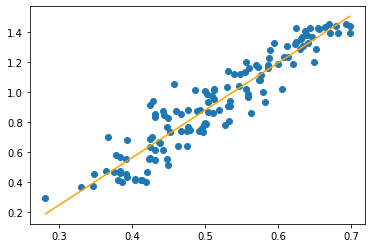

In [36]:
Is = df['Is'].to_numpy().reshape(-1,1)
Cql = df['Cql'].to_numpy().reshape(-1,1)

reg = LinearRegression().fit(Is,Cql)

test_x = np.linspace(Is.min(),Is.max()).reshape(-1,1)
test_y = reg.predict(test_x)



plt.scatter(x=Is, y=Cql)
plt.plot(test_x,test_y, color='orange')
plt.show()

In [37]:
test_df = pd.read_csv('Data4t.csv',delimiter=';', encoding='ANSI')

train_x = df[['Cql','Ie','Iec']]
train_y = df['Is']
reg_with_3_var = LinearRegression().fit(train_x,train_y)
MSE_train = reg_with_3_var.score(train_x, train_y)

test_x = test_df[['Cql','Ie','Iec']]
test_y = test_df['Is']
MSE_test = reg_with_3_var.score(test_x,test_y)
print(f'MSE_train: {MSE_train}, MSE_test: {MSE_test}')

MSE_train: 0.9678926762513697, MSE_test: 0.8996317946789908


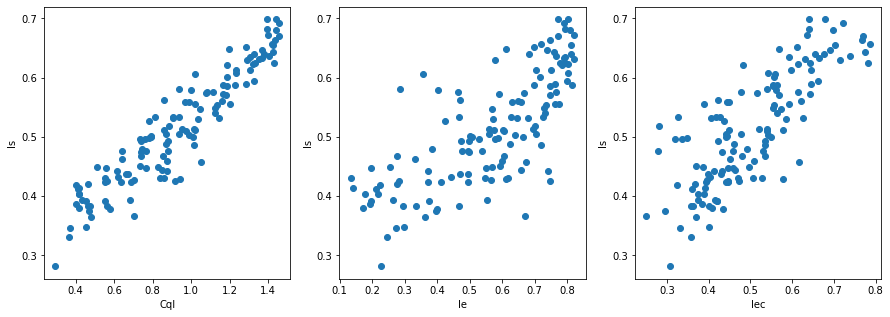

In [38]:
names = ['Cql','Ie','Iec']

fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(len(names)):
    ax[i].scatter(x=df[names[i]],y=df['Is'])
    ax[i].set_xlabel(names[i])
    ax[i].set_ylabel('Is')

In [39]:
poly_train_x = df[['Cql','Ie','Iec']]
poly_train_y = df['Is']

poly_test_x = test_df[['Cql','Ie','Iec']]
poly_test_y = test_df['Is']

pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
pipeline.fit(poly_train_x, poly_train_y)
poly_MSE_train = pipeline.score(train_x, train_y)

# print(poly_test_x)
# print(pipeline['polynomialfeatures'].transform(poly_test_x))
# print(pipeline['linearregression'].coef_)

poly_MSE_test = pipeline.score(poly_test_x,poly_test_y)
print(f'Poly MSE_train: {poly_MSE_train}, Poly MSE_test: {poly_MSE_test}')

Poly MSE_train: 0.9803745958848826, Poly MSE_test: 0.9778817876365523
